In [36]:
# install required packages
#!python3 -m pip install --upgrade requests

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import re
from bs4 import BeautifulSoup
import requests
import wikipedia
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [38]:
# Configurations

PAGE_NAME = "Vehicle subscription"

PAGE_LINK = "https://en.wikipedia.org/wiki/"+ PAGE_NAME.lower().replace(' ', '_')



In [39]:
PAGE_LINK

'https://en.wikipedia.org/wiki/vehicle_subscription'

In [40]:
response = requests.get(PAGE_LINK)
print(response.status_code)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")

200


In [41]:
titles = []
for heading in ['h2', 'h3']:
    print(heading)
    print('----------------')
    for text in soup.find_all(heading):
        print(text.text)
        titles.append(text.text)

for title in list(titles):
    if title in ['References', 'Contents', 'See also', 'External links', 'Navigation menu', '']:
        titles.remove(title)

titles

h2
----------------
Contents
Definition
Common features
Types of providers and business models
References
h3
----------------
Automotive manufacturers
Automotive dealerships
Start-ups and corporate-backed ventures
Car subscription software providers
Other providers


['Definition',
 'Common features',
 'Types of providers and business models',
 'Automotive manufacturers',
 'Automotive dealerships',
 'Start-ups and corporate-backed ventures',
 'Car subscription software providers',
 'Other providers']

In [42]:
# https://en.wikipedia.org/wiki/Vehicle_subscription
wiki = wikipedia.page(PAGE_NAME)
text = wiki.content
# Clean text
text_c = re.sub('[^A-Za-z0-9°]+', ' ', text)
text_c = text_c.replace('\n', '').lower()
text_c

'vehicle subscription is a service where a customer pays a recurring fee for the right to use one or more automotive vehicles some vehicle subscriptions offer insurance and maintenance as part of the subscription fee other subscriptions allow the subscriber to switch between different vehicles during their subscription period industry commentators consider vehicle subscription to be an alternative to owning or leasing a vehicle vehicle subscriptions have been available since 2010 when rima braden of autosource llc offered a short term flexible auto acquisition program from his dealership in honolulu hawaii that he coined flexlease rebranded as carousel in 2013 the program was restricted to the city and county of honolulu and remains in operation today in 2014 flexdrive now jointly owned by cox automotive and holman enterprises launched clutch technologies a start up launched a subscription service for consumers in atlanta in mid 2014 flow automotive companies was the first automotive d

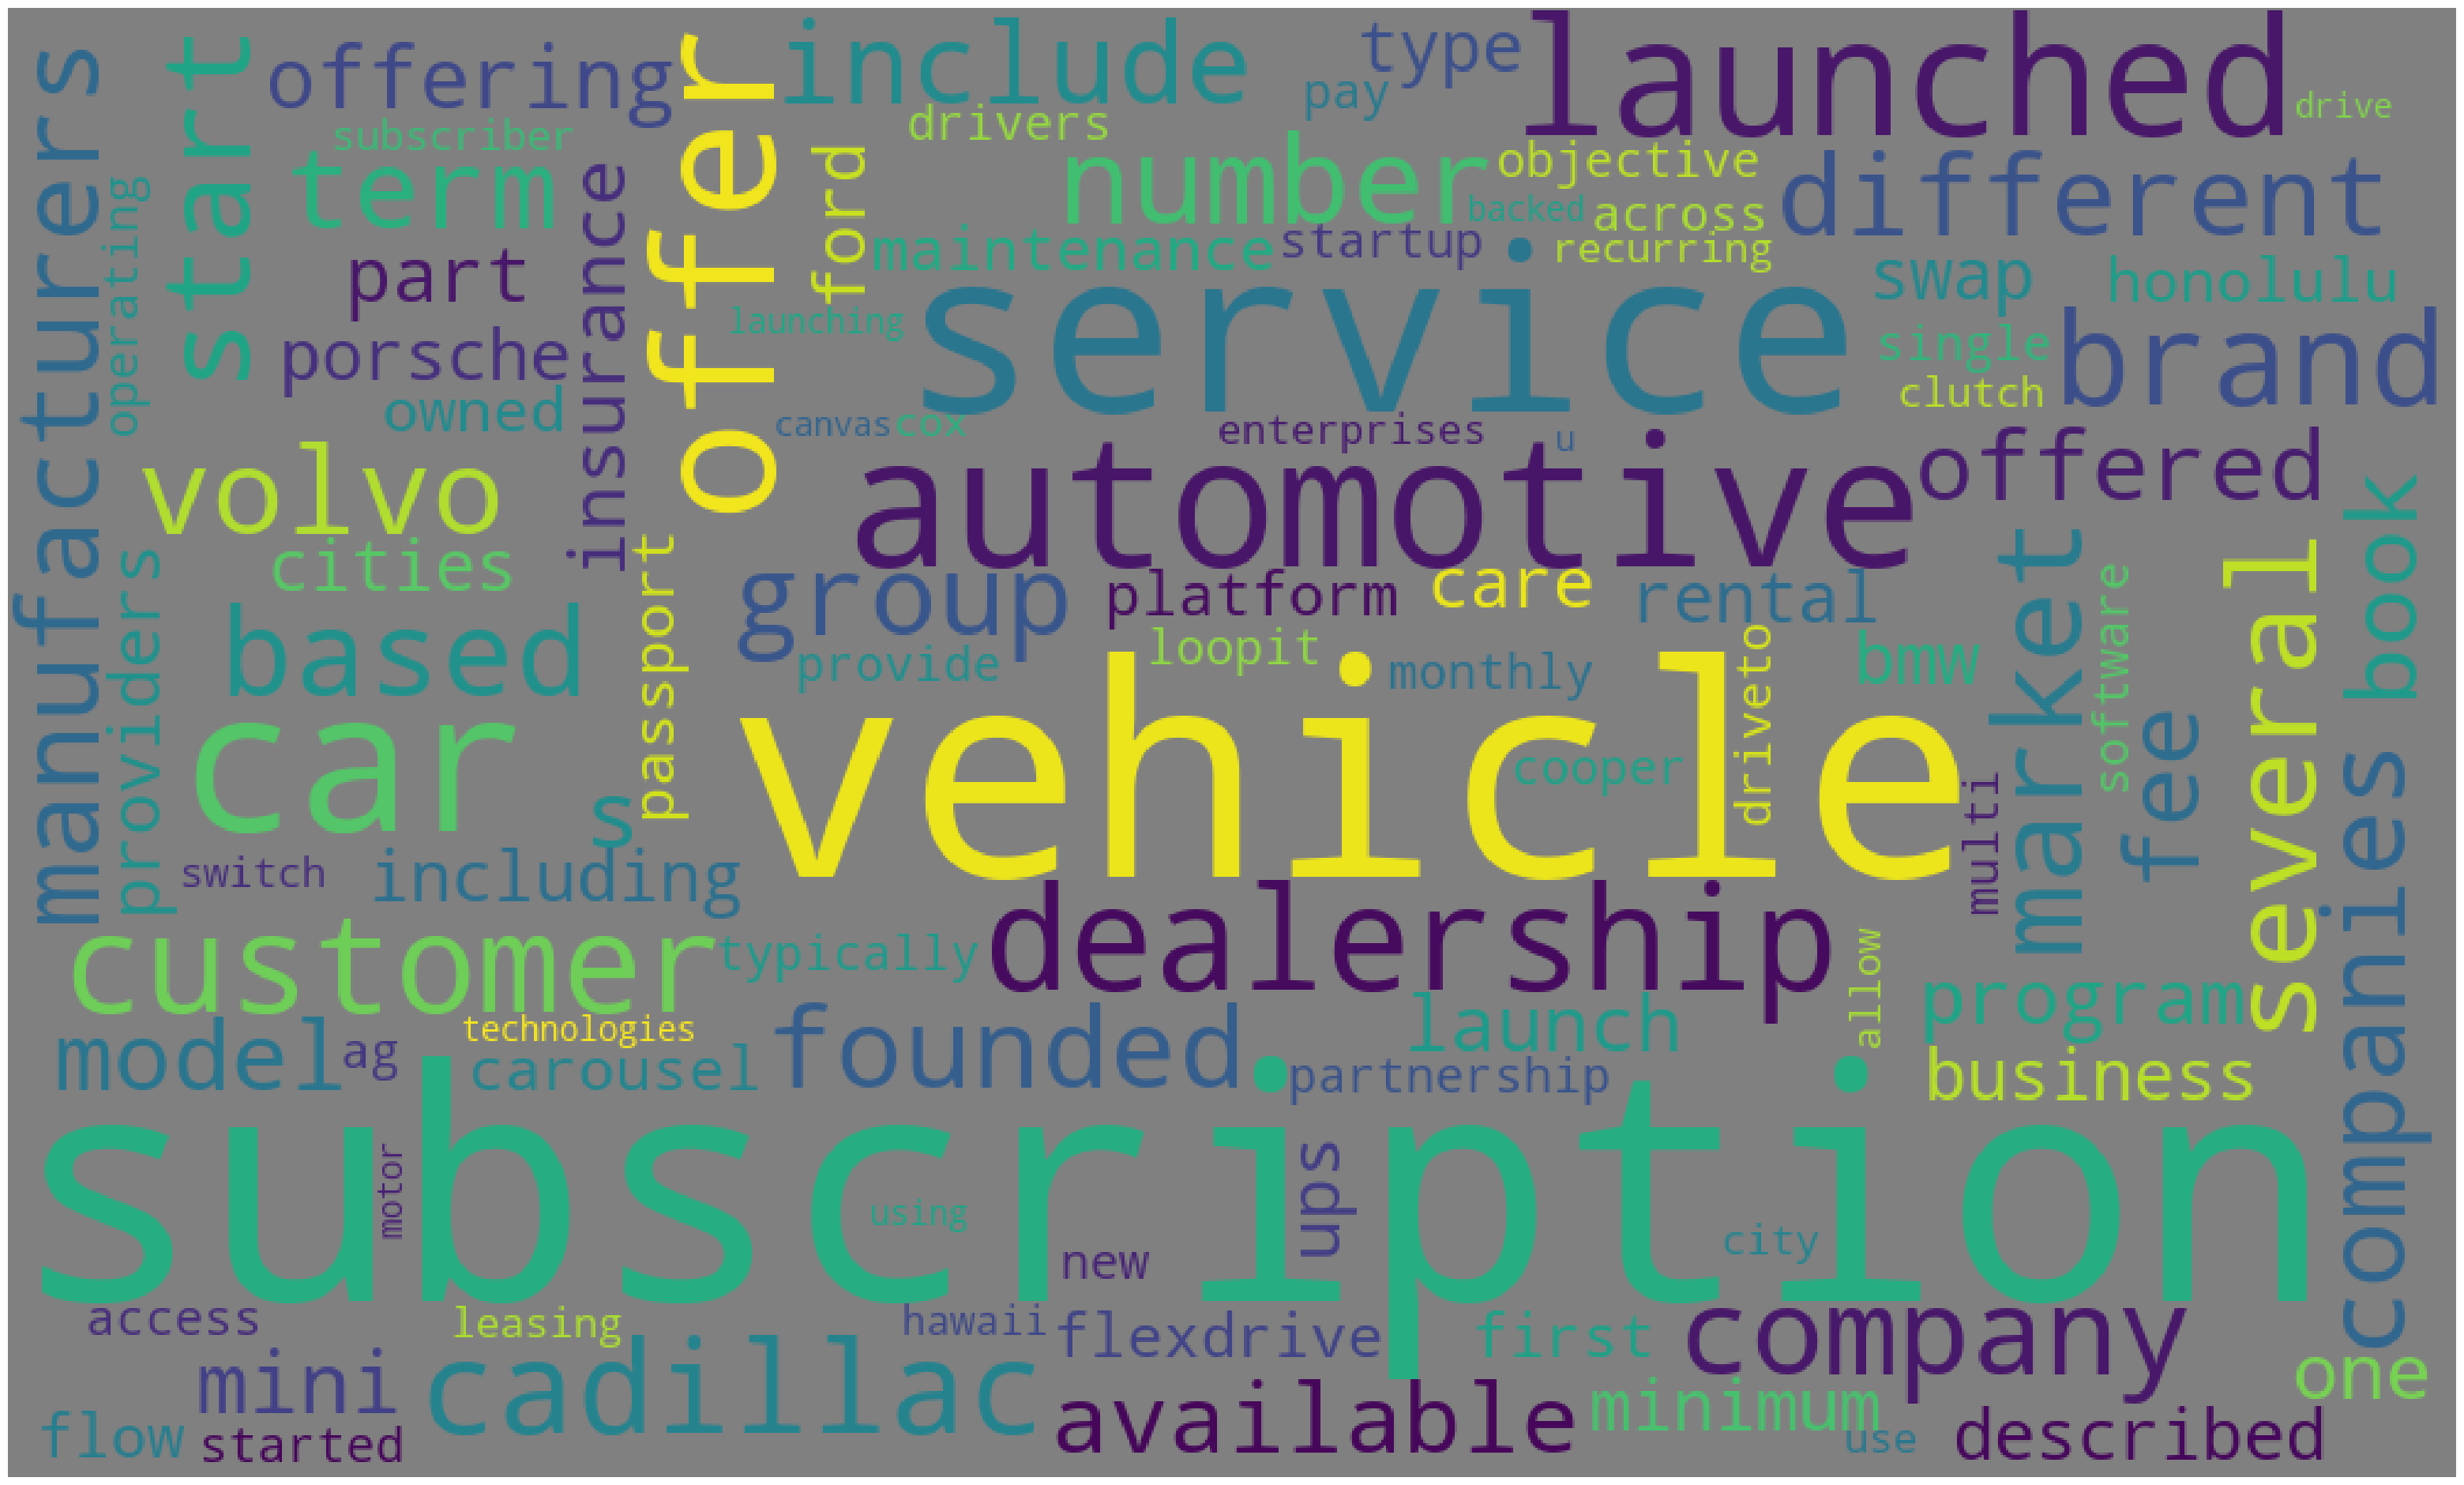

In [43]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width= 1000, height = 600, max_words=100,
                      random_state=1, background_color='gray', colormap='viridis_r',
                      collocations=False, stopwords = STOPWORDS).generate(text_c)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

In [44]:
stop_words = set(stopwords.words("english"))

#create function to get a DataFrame
def get_df(input_text):
    list_words = input_text.split(' ')
    set_words_full = list(set(list_words))
    
    #remove stop words
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [list_words.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [45]:
df_words = get_df(text_c)
df_words.head(10)

,words,count
0,subscription,41
1,vehicle,35
2,subscriptions,18
3,car,17
4,automotive,16
5,service,15
6,vehicles,14
7,launched,13
8,offer,12
9,services,11


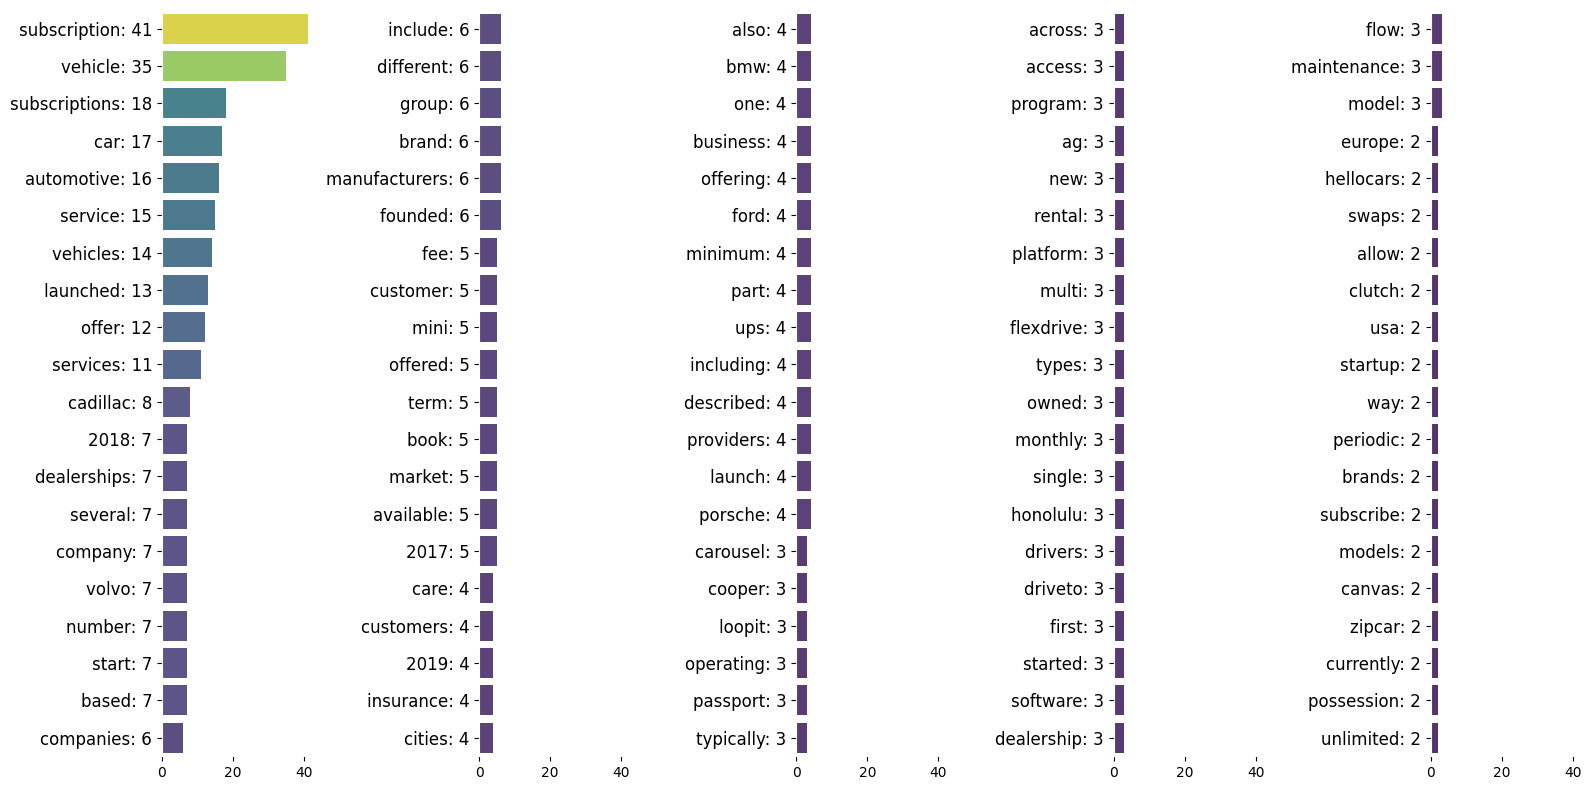

In [46]:
#create index list for slicing
index_list = [[i[0],i[-1]+1] for i in np.array_split(range(100), 5)]

n = df_words['count'].max()
color_dict = get_colordict('viridis', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16,8), facecolor='white', squeeze=False)
for col, idx in zip(range(0,5), index_list):
    df = df_words[idx[0]:idx[-1]]
    label = [w + ': ' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,20))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0,n+1)                     #set X axis range max
    axs[0][col].set_yticklabels(label, fontsize=12)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
            
plt.tight_layout()    
plt.show()

In [47]:
#manually create a list of contents
contents = titles

pr_text = []
#slice text with content list
for i in contents:
    idx1 = contents.index(i)
    if (idx1>=0) and (idx1<=len(contents)-2):
        text_s1 = text.split('\n\n\n== ' + i)[0]
        text_s2 = text_s1.split('\n\n\n== ' + contents[idx1+1])[0]
        pr_text.append(text_s2)
    else:
        pass

In [48]:
#clean text in each content   
cn_clean_text = [re.sub('[^A-Za-z0-9°]+', ' ', t).lower() for t in pr_text]

#create DataFrame from top 10 words most appear in each content  
df_cn_words = [list(get_df(i)['words'][0:10]) for i in cn_clean_text]
df_cn_count = [list(get_df(i)['count'][0:10]) for i in cn_clean_text]
df_cn_content = [[i.lower()] * len(j) for i,j in zip(contents, df_cn_words)]

df_cont = pd.DataFrame(zip(sum(df_cn_content,[]), sum(df_cn_words,[]),sum(df_cn_count,[])),
                       columns = ['contents','words','count'])
df_cont

,contents,words,count
0,definition,subscription,8
1,definition,automotive,6
2,definition,vehicle,5
3,definition,subscriptions,4
4,definition,service,3
...,...,...,...
65,car subscription software providers,service,15
66,car subscription software providers,vehicles,14
67,car subscription software providers,launched,13
68,car subscription software providers,offer,12


In [49]:
#color dictionary
n = df_cont['count'].max()
color_dict = get_colordict('viridis',n , 1)

#create a list contains DataFrame of each content
keep_dfcon = [df_cont[df_cont['contents']==i.lower()] for i in contents[0:-1]]
num_w = len(keep_dfcon)

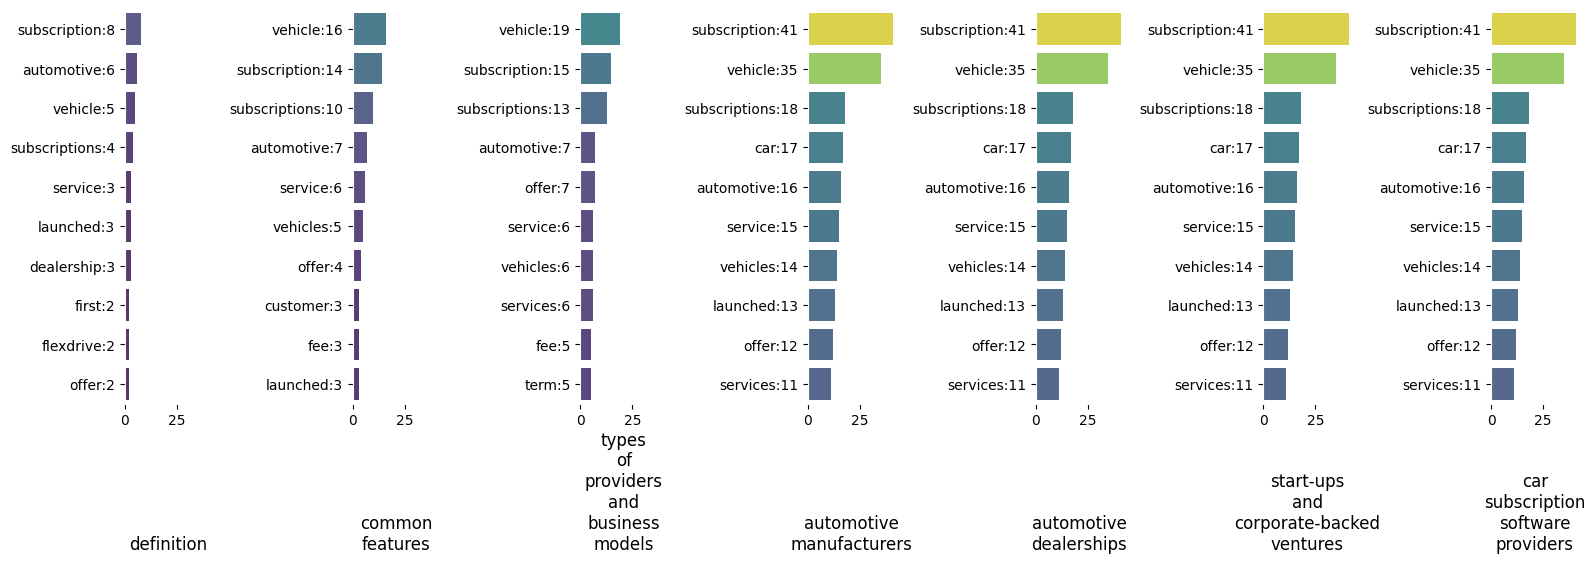

In [50]:
fig, axs = plt.subplots(1, num_w, figsize=(16,6), facecolor='white', squeeze=False)
for col, df in zip(range(0, num_w), keep_dfcon):
    label = [w + ':' + str(n) for w,n in zip(df['words'],df['count'])]
    color_l = [color_dict.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0,10))
    
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient = 'h',
                ax = axs[0][col], palette = color_l)
    axs[0][col].set_xlim(0, n+1)     #set X axis range max
    axs[0][col].set_yticklabels(label)
    axs[0][col].spines['bottom'].set_color('white')
    axs[0][col].spines['right'].set_color('white')
    axs[0][col].spines['top'].set_color('white')
    axs[0][col].spines['left'].set_color('white')
    title = df['contents'].iloc[0].replace(' ','\n')
    axs[0][col].set_title(title, y=-0.39)        

plt.tight_layout()    
plt.show()

In [51]:
n = 30
pal = list(sns.color_palette(palette='Reds_r', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(df_words[0:30], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [52]:
#DataFrame summing words from each content 
df_sum = df_cont.groupby(['contents']).sum().reset_index()

#create list for pre_words for using with plolty Sunburst Plot
pre_words = [i.split(' ')[0] for i in sum(df_cn_content,[])]
sb_words = [j+'_'+i+' '+str(k) for i,j,k in zip(sum(df_cn_words,[]),
                                                pre_words,
                                                sum(df_cn_count,[]))] + list(df_sum['contents'])

sb_count = sum(df_cn_count,[]) + list(df_sum['count'])
sb_contents = sum(df_cn_content,[]) + [PAGE_NAME]*len(list(df_sum['contents']))

In [53]:
#color dict for words
list_cn_count = sum(df_cn_count,[])
nc = max(list_cn_count) - min(list_cn_count) + 1
color_w = get_colordict('Reds', nc, min(list_cn_count))

#color dict for contents
list_sum_count = list(df_sum['count'])
nw = max(list_sum_count) - min(list_sum_count) + 1
color_c = get_colordict('Reds', nw, min(list_sum_count))

#create color list
sb_color=[color_w.get(i) for i in sum(df_cn_count,[])]+[color_c.get(i) for i in list(df_sum['count'])]

In [54]:
import plotly.graph_objects as go
fig = go.Figure(go.Sunburst(labels = sb_words,
                            parents = sb_contents,
                            values = sb_count,
                            marker = dict(colors=sb_color)
                           ))
fig.update_layout(width=800, height=800,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [55]:
import plotly.express as px
fig = px.treemap(df_words[0:100], path=[px.Constant(PAGE_NAME), 'words'],
                 values='count',
                 color='count',
                 color_continuous_scale='viridis',
                 color_continuous_midpoint=np.average(df_words['count'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [56]:

import plotly.express as px
fig = px.treemap(df_cont, path=[px.Constant(PAGE_NAME), 'contents', 'words'],
                 values='count',
                 color='count', hover_data=['count'],
                 color_continuous_scale='viridis',
                 color_continuous_midpoint=np.average(df_cont['count'])
                )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [57]:
import circlify
# compute circle positions:
circles = circlify.circlify(df_words['count'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = df_words['count'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

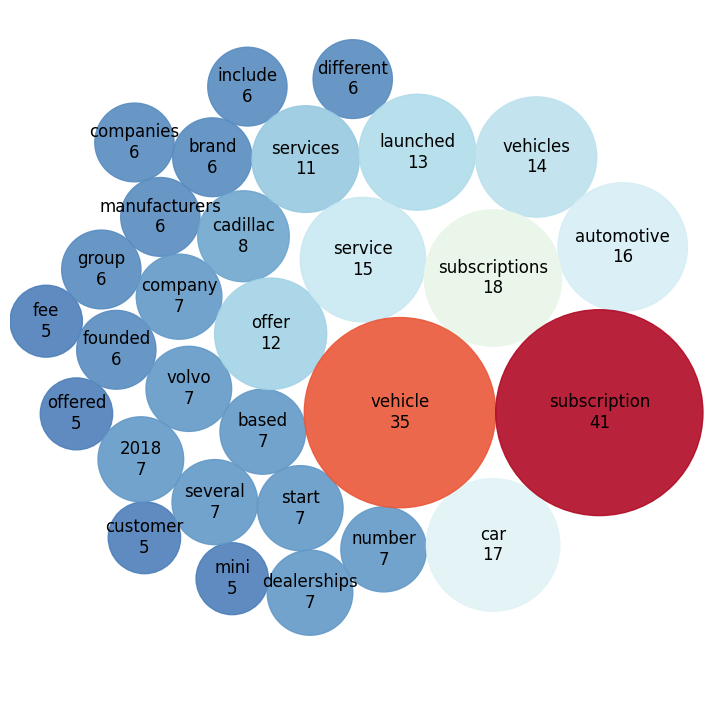

In [58]:
fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(df_words['words'][0:30])
counts = list(df_words['count'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [59]:
df_cont['topic'] = [PAGE_NAME]*len(df_cont)
df_cont = df_cont[['topic','contents','words','count']]

#adjust data format ('id', 'datum', 'children') for working with circlify 
keep_sub = []
for ii in list(set(df_cont.iloc[:,1])):
    df_lv2 = df_cont[df_cont[df_cont.columns[1]]==ii]
    df_lv2_gb = df_cont.groupby([df_cont.columns[1]]).sum().reset_index()
    df_lv2_gbii = df_lv2_gb[df_lv2_gb['contents']==ii]
    
    se_lv3 = [{'id':i,'datum':j} for i,j in zip(df_lv2['words'], df_lv2['count'])]
    dict_lv2_lv3 = {'id':df_lv2_gbii.iloc[0,0],'datum':df_lv2_gbii.iloc[0,1],'children':se_lv3}
    keep_sub.append(dict_lv2_lv3)
    
df_lv1_gb = df_cont.groupby([df_cont.columns[0]]).sum().reset_index()
data = [{'id': df_lv1_gb.iloc[0,0],'datum': df_lv1_gb.iloc[0,1],'children':keep_sub}]
data

[{'id': 'Vehicle subscription',
  'datum': 966,
  'children': [{'id': 'start-ups and corporate-backed ventures',
    'datum': 192,
    'children': [{'id': 'subscription', 'datum': 41},
     {'id': 'vehicle', 'datum': 35},
     {'id': 'subscriptions', 'datum': 18},
     {'id': 'car', 'datum': 17},
     {'id': 'automotive', 'datum': 16},
     {'id': 'service', 'datum': 15},
     {'id': 'vehicles', 'datum': 14},
     {'id': 'launched', 'datum': 13},
     {'id': 'offer', 'datum': 12},
     {'id': 'services', 'datum': 11}]},
   {'id': 'car subscription software providers',
    'datum': 192,
    'children': [{'id': 'subscription', 'datum': 41},
     {'id': 'vehicle', 'datum': 35},
     {'id': 'subscriptions', 'datum': 18},
     {'id': 'car', 'datum': 17},
     {'id': 'automotive', 'datum': 16},
     {'id': 'service', 'datum': 15},
     {'id': 'vehicles', 'datum': 14},
     {'id': 'launched', 'datum': 13},
     {'id': 'offer', 'datum': 12},
     {'id': 'services', 'datum': 11}]},
   {'id': 'a

In [60]:
circles = circlify.circlify(data, 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0, r=1)
                           )
n = df_cont['count'].max()
color_dict_lv3 = get_colordict('RdYlBu_r',n ,1)

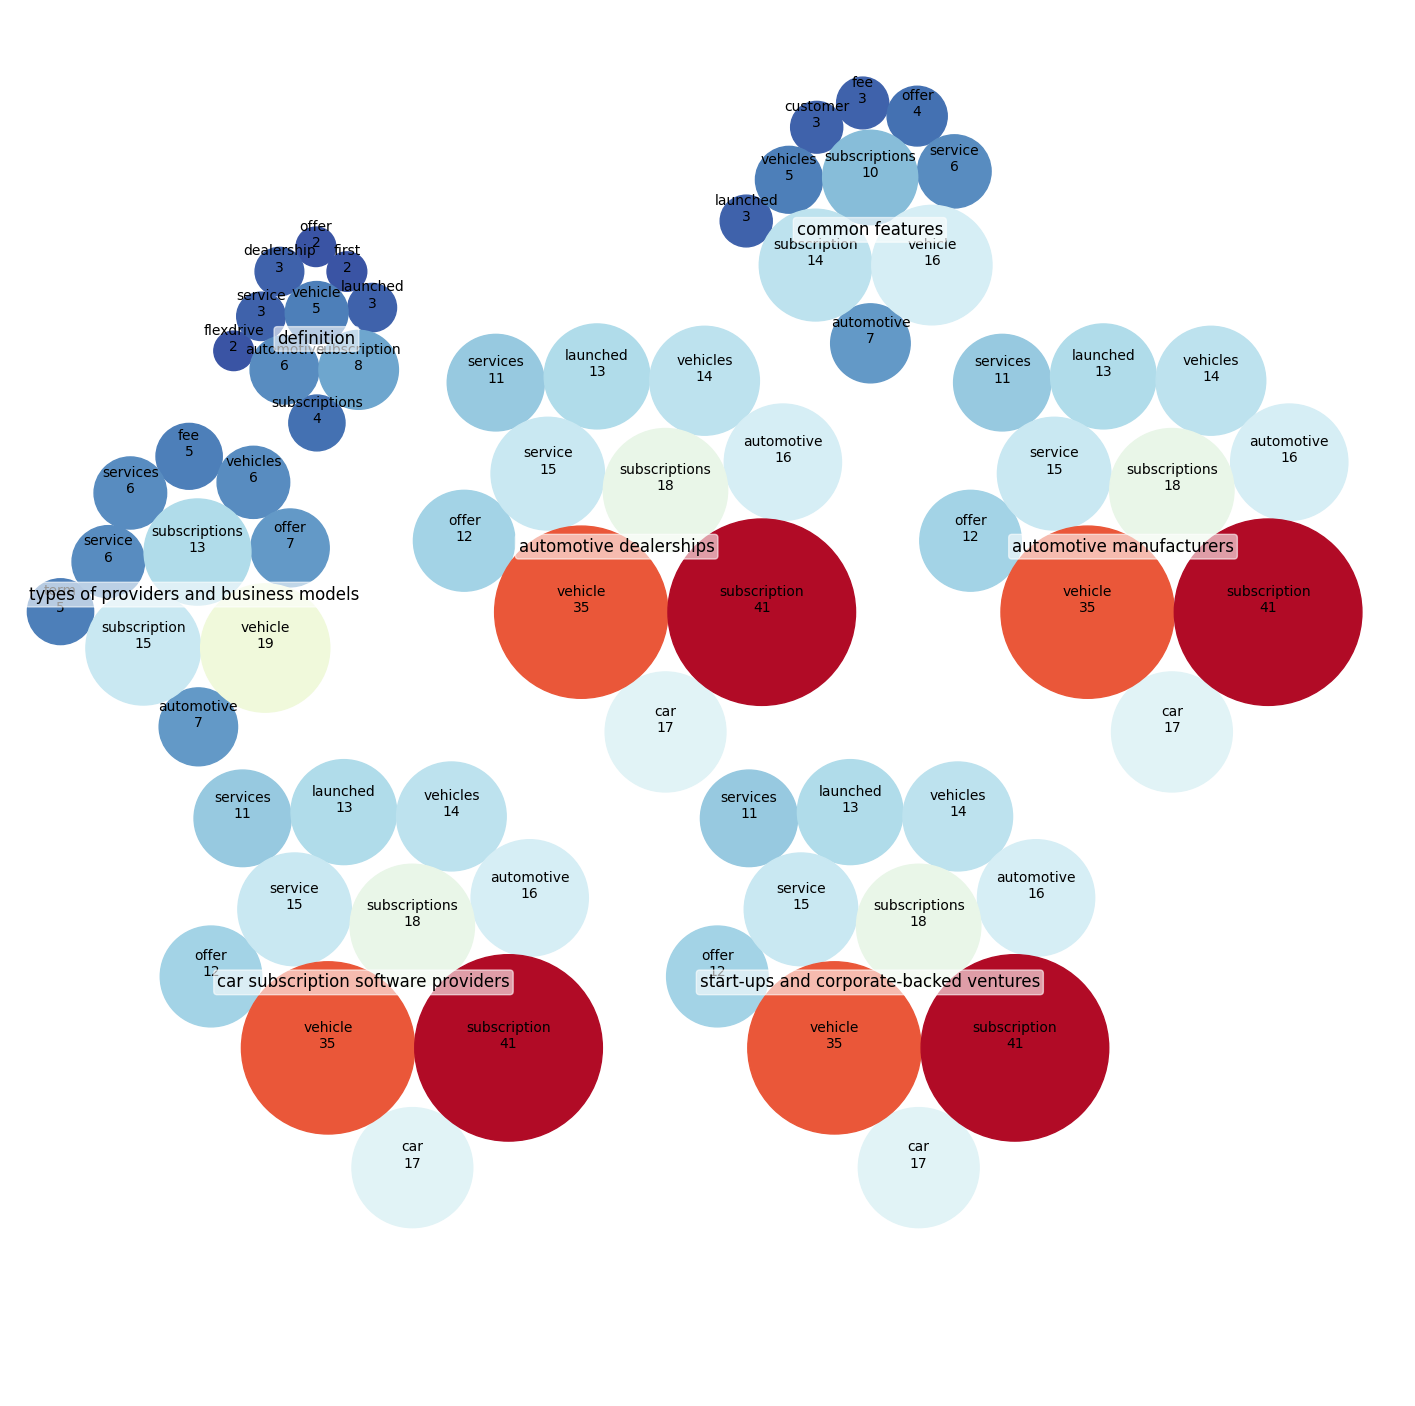

In [61]:
fig, ax = plt.subplots(figsize=(18,18), facecolor='white')
ax.axis('off')
# Find axis boundaries
lim = max(max(abs(circle.x) + circle.r,abs(circle.y) + circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (contents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, color="white"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, color=color_dict_lv3.get(circle.ex['datum'])))
    #annotate each circle
    plt.annotate(label +'\n' +str(circle.ex['datum']), (x,y ), ha='center', color="black")

# Print labels for the contents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y) ,va='center', ha='center', size=12,
                 bbox=dict(facecolor='white', edgecolor='white',
                           alpha=0.6, boxstyle='round', pad=.2))